In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
import os
import json
import twitter
import tweepy
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [2]:
# function to take the tweepy objects and convert them to json

def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

In [3]:
# set my api data as strings for building the full url

API_key = 'EI6BanY3IZEewp9ipXLgxJJ9v'
API_secret = 'tZv8Hoq5ZIUfm4GWYCY6MZJUaCFGc0pI7Kv73IbJXaEqqeO1bh'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKEFSAEAAAAAE2DJy%2B8OAidrXu%2ByfPEWJ61aEfw%3DKYlf86Bxqhh0Gcx7e8wsSe8gpV2cDZ4ZcPpDhy1CsLAbqQhDpM'
access_token = '1242116952610365441-ixzxZbvnc4QmMzF1lJOiLsalqnosj8'
access_secret = 'I7XzLK0sTaBOczlK22D2kK77OlCfBhqBcqaJwR581nMcv'
auth = tweepy.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_secret)
tweepy_api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [50]:
# Selecting a hashtag to search twitter for online payment hashtags and choosing the most recent 1000

choice=input('What hashtag would you like to search? ')
tweets=list(tweepy.Cursor(tweepy_api.search,q=choice, tweet_mode='extended').items(1000))

What hashtag would you like to search? cashapp


In [51]:
tweet_list = [jsonify_tweepy(t) for t in tweets]

In [52]:
# creating a dataframe from the json objects

df_ca = pd.json_normalize(tweet_list)

In [53]:
df_ca.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Mon Oct 11 00:17:45 +0000 2021,1447355706223435777,1447355706223435777,"cashapp me rn, HURRY UP 🥱🤨💅 https://t.co/hMMK5...",False,"[0, 27]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Oct 11 00:17:41 +0000 2021,1447355687206461442,1447355687206461442,RT @queersocialism: a black lesbian is in need...,False,"[0, 148]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Oct 11 00:17:37 +0000 2021,1447355670601232387,1447355670601232387,RT @morenosamuel7: It is brutally cold and bor...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Oct 11 00:17:24 +0000 2021,1447355615790129152,1447355615790129152,Please provide a reference!\n\nAdditional $5 b...,False,"[0, 237]","<a href=""http://twitter.com/download/android"" ...",1.447355e+18,1447354765822861314,1.125403e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Oct 11 00:17:22 +0000 2021,1447355610702532611,1447355610702532611,RT @Allenownz: Buying someone pizza for NFL Su...,False,"[0, 137]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
frames = [df_pp, df_vm, df_ze, df_ca]
df_combined = pd.concat(frames)

In [55]:
df_combined.shape

(2637, 338)

In [56]:
df_combined.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates
0,Sun Oct 10 23:38:18 +0000 2021,1447345777693573122,1447345777693573122,@lysisbunny @wheeingloss Dm me if you need hel...,False,"[25, 93]","<a href=""http://twitter.com/download/iphone"" r...",1.447346e+18,1447345690762416133,1.389779e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Oct 10 23:38:15 +0000 2021,1447345763286011906,1447345763286011906,RT @nope_thank_u: OR countless other Māori org...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Oct 10 23:37:50 +0000 2021,1447345659854548997,1447345659854548997,RT @voicesofvv: Driving around to our usual sp...,False,"[0, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Oct 10 23:37:41 +0000 2021,1447345624014327810,1447345624014327810,RT @roshan_pie: I'm struggling financially rig...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Oct 10 23:37:15 +0000 2021,1447345514085748736,1447345514085748736,@babyygirlvenus Dm me if you need help with bi...,False,"[16, 84]","<a href=""http://twitter.com/download/iphone"" r...",1.447345e+18,1447344894544990209,1.447338e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for col in df_combined.columns:
    print(col)

created_at
id
id_str
full_text
truncated
display_text_range
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang
entities.hashtags
entities.symbols
entities.user_mentions
entities.urls
metadata.iso_language_code
metadata.result_type
user.id
user.id_str
user.name
user.screen_name
user.location
user.description
user.url
user.entities.description.urls
user.protected
user.followers_count
user.friends_count
user.listed_count
user.created_at
user.favourites_count
user.utc_offset
user.time_zone
user.geo_enabled
user.verified
user.statuses_count
user.lang
user.contributors_enabled
user.is_translator
user.is_translation_enabled
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_image_url
user.profile_image_url_https
user.profile_

In [28]:
df_combined.lang.unique()

array(['en', 'es', 'et', 'und', 'ht', 'cy', 'de', 'it', 'da', 'nl', 'fr',
       'pt', 'tl', 'ja', 'zh', 'th', 'tr', 'ko', 'in'], dtype=object)

In [57]:
df_slim = df_combined[['created_at','full_text','source','geo','lang','entities.hashtags']]

In [58]:
df_slim = df_slim[df_slim['lang'] == 'en']

In [59]:
df_slim.shape

(2523, 6)

In [2]:
df_slim.to_csv('Tweets.csv',encoding='utf-8',index=False)

NameError: name 'df_slim' is not defined

In [3]:
df = pd.read_csv('Tweets.csv')
df.head()

,created_at,full_text,source,geo,lang,entities.hashtags
0,Sun Oct 10 23:38:18 +0000 2021,@lysisbunny @wheeingloss Dm me if you need hel...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[]
1,Sun Oct 10 23:38:15 +0000 2021,RT @nope_thank_u: OR countless other Māori org...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[]
2,Sun Oct 10 23:37:50 +0000 2021,RT @voicesofvv: Driving around to our usual sp...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,en,[]
3,Sun Oct 10 23:37:41 +0000 2021,RT @roshan_pie: I'm struggling financially rig...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[]
4,Sun Oct 10 23:37:15 +0000 2021,@babyygirlvenus Dm me if you need help with bi...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[]


In [6]:
def clean_text(text):
    text=text.lower()
    text=re.sub('\\d|\\W+|_',' ',text)
    text=re.sub('[^a-zA-Z]'," ", text)
    
    return text
    

In [7]:
def tokenize(text):
    stop_words = stopwords.words('english') + ADDITIONAL_STOPWORDS
    txt_token= word_tokenize(text)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    
    return txt_no_stopwords

ADDITIONAL_STOPWORDS = ['paypal','venmo','zelle','cashapp']

In [8]:
def stem_text(word_list):
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]

In [4]:
df2 = df.copy()

In [9]:
df2['txt_clean'] = df2['full_text'].apply(clean_text)
df2['txt_tokenized'] = df2['txt_clean'].apply(tokenize)
df2['txt_stemmed'] = df2['txt_tokenized'].apply(stem_text)
df2['text_final'] = df2['txt_stemmed'].apply(lambda text: ' '.join(text))
df2.head()

,created_at,full_text,source,geo,lang,entities.hashtags,txt_clean,txt_tokenized,txt_stemmed,text_final
0,Sun Oct 10 23:38:18 +0000 2021,@lysisbunny @wheeingloss Dm me if you need hel...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],lysisbunny wheeingloss dm me if you need help...,"[lysisbunny, wheeingloss, dm, need, help, bill...","[lysisbunni, wheeingloss, dm, need, help, bill...",lysisbunni wheeingloss dm need help bill cash app
1,Sun Oct 10 23:38:15 +0000 2021,RT @nope_thank_u: OR countless other Māori org...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],rt nope thank u or countless other m ori organ...,"[rt, nope, thank, u, countless, ori, organisat...","[rt, nope, thank, u, countless, ori, organis, ...",rt nope thank u countless ori organis fight or...
2,Sun Oct 10 23:37:50 +0000 2021,RT @voicesofvv: Driving around to our usual sp...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,en,[],rt voicesofvv driving around to our usual spot...,"[rt, voicesofvv, driving, around, usual, spots...","[rt, voicesofvv, drive, around, usual, spot, w...",rt voicesofvv drive around usual spot weekli d...
3,Sun Oct 10 23:37:41 +0000 2021,RT @roshan_pie: I'm struggling financially rig...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],rt roshan pie i m struggling financially right...,"[rt, roshan, pie, struggling, financially, rig...","[rt, roshan, pie, struggl, financi, right, emp...",rt roshan pie struggl financi right employ end...
4,Sun Oct 10 23:37:15 +0000 2021,@babyygirlvenus Dm me if you need help with bi...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],babyygirlvenus dm me if you need help with bi...,"[babyygirlvenus, dm, need, help, bills, cash, ...","[babyygirlvenu, dm, need, help, bill, cash, app]",babyygirlvenu dm need help bill cash app


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   created_at         2523 non-null   object 
 1   full_text          2523 non-null   object 
 2   source             2523 non-null   object 
 3   geo                0 non-null      float64
 4   lang               2523 non-null   object 
 5   entities.hashtags  2523 non-null   object 
 6   txt_clean          2523 non-null   object 
 7   txt_tokenized      2523 non-null   object 
 8   txt_stemmed        2523 non-null   object 
 9   text_final         2523 non-null   object 
dtypes: float64(1), object(9)
memory usage: 108.5+ KB


In [24]:
top5_platform = df2.source.value_counts().head()

In [25]:
top5_platform.index

Index(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype='object')

In [30]:
starting_index = top5_platform.index.str.find('>')
starting_index

Int64Index([59, 60, 51, 60, 69], dtype='int64')

In [31]:
ending_index = top5_platform.index.str.find('<', 1)
ending_index

Int64Index([78, 80, 67, 77, 79], dtype='int64')

In [ ]:
top5_platform.index.apply()

In [ ]:
top5_platform['platform'] = 

In [145]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review) # calculating the polarity scores for each doc in the corpus
    return vs['compound'] # returning the compound score
    
    
def vader_analysis(compound): # setting thresholds for what compound scores are considered positive, negative, or neutral
    if compound >=0.5:
        return 'Positive'
    elif compound <0:
        return 'Negative'
    else:
        return 'Neutral'

In [146]:
# initializing the analyzer from Vader

analyzer = SentimentIntensityAnalyzer()

In [147]:
# creating 2 new columns in the dataframe applying the two functions defined above

df2['Vader Sentiment'] = df2['text_final'].apply(vadersentimentanalysis)
df2['Vader Analysis'] = df2['Vader Sentiment'].apply(vader_analysis)
df2.head()

,created_at,full_text,source,geo,lang,entities.hashtags,tokenized,txt_clean,txt_tokenized,txt_stemmed,text_final,Vader Sentiment,Vader Analysis
0,Sun Oct 10 23:38:18 +0000 2021,@lysisbunny @wheeingloss Dm me if you need hel...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],lysisbunny wheeingloss dm me if you need help ...,lysisbunny wheeingloss dm me if you need help...,"[lysisbunny, wheeingloss, dm, need, help, bill...","[lysisbunni, wheeingloss, dm, need, help, bill...",lysisbunni wheeingloss dm need help bill cash app,0.4019,Neutral
1,Sun Oct 10 23:38:15 +0000 2021,RT @nope_thank_u: OR countless other Māori org...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],rt nopethanku or countless other māori organis...,rt nope thank u or countless other m ori organ...,"[rt, nope, thank, u, countless, ori, organisat...","[rt, nope, thank, u, countless, ori, organis, ...",rt nope thank u countless ori organis fight or...,0.1999,Neutral
2,Sun Oct 10 23:37:50 +0000 2021,RT @voicesofvv: Driving around to our usual sp...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,en,[],rt voicesofvv driving around to our usual spot...,rt voicesofvv driving around to our usual spot...,"[rt, voicesofvv, driving, around, usual, spots...","[rt, voicesofvv, drive, around, usual, spot, w...",rt voicesofvv drive around usual spot weekli d...,0.3612,Neutral
3,Sun Oct 10 23:37:41 +0000 2021,RT @roshan_pie: I'm struggling financially rig...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],rt roshanpie im struggling financially right n...,rt roshan pie i m struggling financially right...,"[rt, roshan, pie, struggling, financially, rig...","[rt, roshan, pie, struggl, financi, right, emp...",rt roshan pie struggl financi right employ end...,0.0000,Neutral
4,Sun Oct 10 23:37:15 +0000 2021,@babyygirlvenus Dm me if you need help with bi...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,en,[],babyygirlvenus dm me if you need help with bil...,babyygirlvenus dm me if you need help with bi...,"[babyygirlvenus, dm, need, help, bills, cash, ...","[babyygirlvenu, dm, need, help, bill, cash, app]",babyygirlvenu dm need help bill cash app,0.4019,Neutral


In [148]:
# overall count of positive vs negative vs neutral

vader_counts = df2['Vader Analysis'].value_counts()
vader_counts

Neutral     1644
Positive     511
Negative     368
Name: Vader Analysis, dtype: int64

In [149]:
print(vader_counts)

Neutral     1644
Positive     511
Negative     368
Name: Vader Analysis, dtype: int64


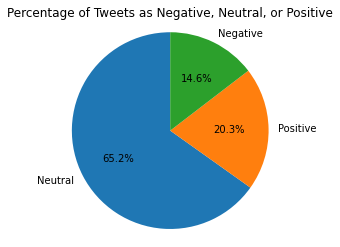

In [150]:
# Pie Chart

plt.pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%', startangle=90, 
       shadow=False)
plt.title('Percentage of Tweets as Negative, Neutral, or Positive')
plt.axis('scaled')
plt.show()

In [210]:
# This pie chart shows that a majority of the tweets pulled for "paypal",'venmo','cashapp',and 'zelle' are 
# neutral according to Vader.

In [151]:
df_neg = df2[df2['Vader Analysis'] == 'Negative']

In [152]:
corpus = df_neg['text_final']

In [153]:
negative = pd.Series(' '.join(corpus).split()).value_counts()[:10]
negative

rt        159
drop      139
dm         95
someon     84
pay        83
get        77
cash       68
app        62
http       57
co         55
dtype: int64

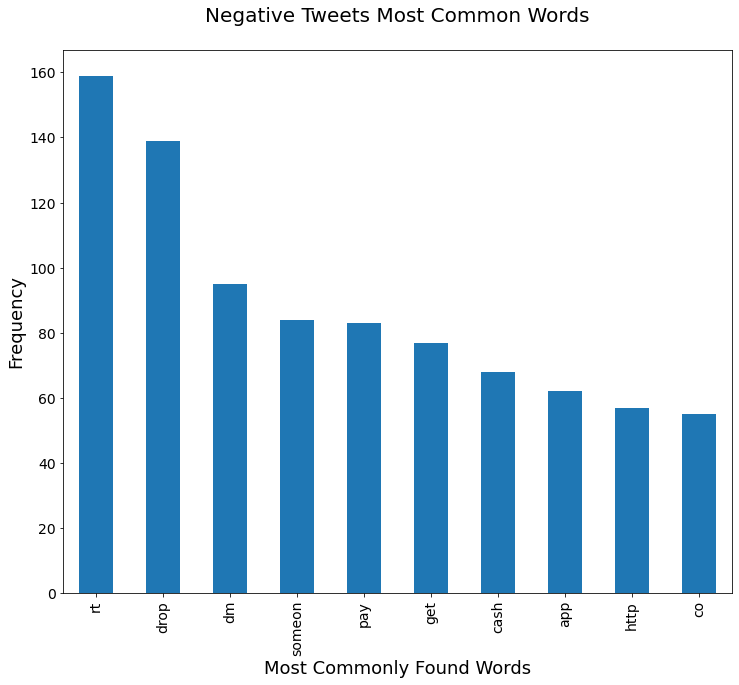

In [154]:
ax=negative.plot(kind='bar',fontsize=14,figsize=(12,10))
ax.set_title('Negative Tweets Most Common Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Most Commonly Found Words', fontsize=18)
plt.show()

In [208]:
# These most frequently used negative words tell me likely that most negative tweets are being asked by the author
# to be retweeted ("rt"). Also DM and someone likely mean the author is asking someone to contact them back via direct message

In [155]:
df_pos = df2[df2['Vader Analysis'] == 'Positive']
corpus = df_pos['text_final']
positive = pd.Series(' '.join(corpus).split()).value_counts()[:10]
positive

help       413
rt         323
bill       304
need       206
pay        160
co         122
http       122
financi     98
rent        93
want        92
dtype: int64

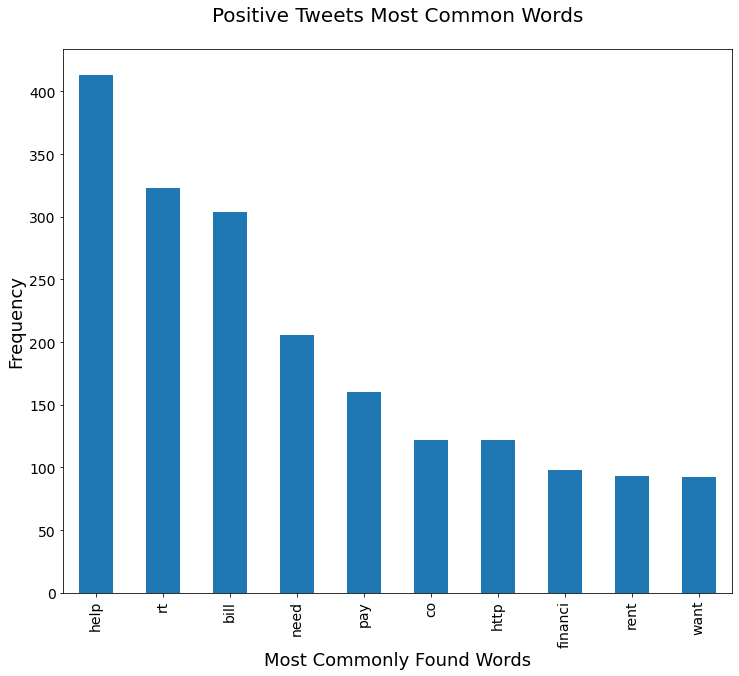

In [156]:
ax=positive.plot(kind='bar',fontsize=14,figsize=(12,10))
ax.set_title('Positive Tweets Most Common Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Most Commonly Found Words', fontsize=18)
plt.show()

In [209]:
# These positive words I believe may not be as helpful because the top word is "help". I wonder if this means that 
# spambots on Twitter use it to get around filtering

In [186]:
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df2['text_final'])
frequences=sum(sparse_matrix).toarray()[0]
overall_freq = pd.DataFrame(frequences, index=word_vectorizer.get_feature_names(),columns=['frequency'])

In [182]:
sorted_freqdf = overall_freq.sort_values(by=['frequency'], ascending=False)

In [184]:
sorted_freqdf.head(20)

,frequency
rt,1548
help,664
need,493
bill,488
http,454
co,453
http co,444
dm,421
pay,304
cash,280


In [193]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [194]:
words = basic_clean(''.join(str(df2['text_final'].tolist())))

In [202]:
bigrams = pd.Series(nltk.ngrams(words,2)).value_counts()[:12]

In [203]:
bigrams

(http, co)          444
(cash, app)         232
(need, help)        218
(appl, pay)         120
(rt, jayecan)       108
(jayecan, post)     108
(post, bitcoin)     108
(pay, bill)         101
(bitcoin, gcash)     86
(phone, bill)        82
(lol, rt)            81
(dm, need)           79
dtype: int64

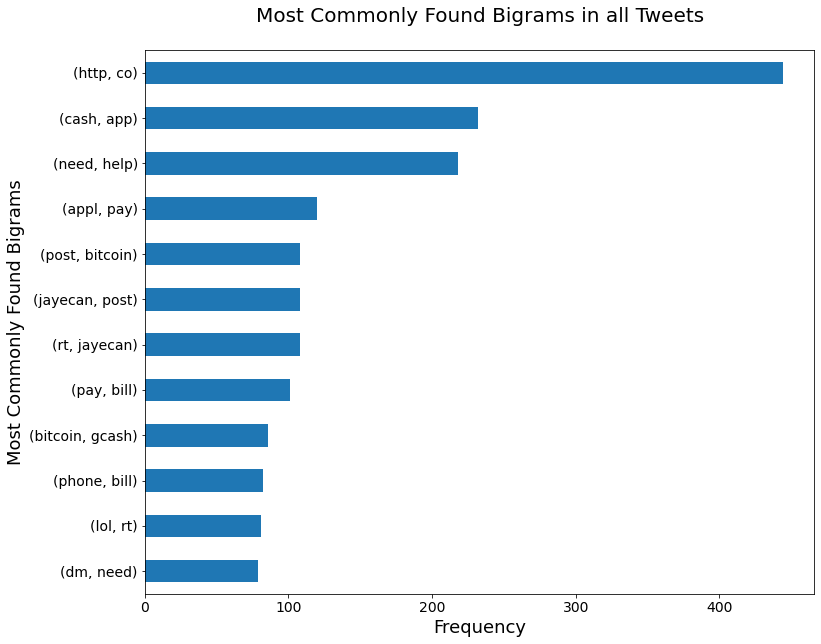

In [206]:
ax=bigrams.sort_values().plot(kind='barh',fontsize=14,figsize=(12,10))
ax.set_title('Most Commonly Found Bigrams in all Tweets\n', fontsize=20)
ax.set_ylabel('Most Commonly Found Bigrams', fontsize=18)
ax.set_xlabel('Frequency', fontsize=18)
plt.show()

In [207]:
# With this chart, I think there are quite a few tweets that have an address included in the tweet due to the "http" and "co".

# Also, this likely includes cash & app being split to avoid Twitter's spam detectors. The third item, "need, help"
# likely are sent by real people and asking for help.